In [14]:
import numpy as np
import pandas as pd
from content_parsing import build_converter, extract_pdf_components
from PIL import Image
import io
from IPython.display import display

In [3]:
pdf_path = './1-s2.0-S2667056922000657-main.pdf'

In [4]:
converter = build_converter(ocr=False, image_scale=2.0, table_mode="ACCURATE")

In [5]:
result = extract_pdf_components(pdf_path, converter)

2025-09-10 15:33:26,693 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-09-10 15:33:26,740 - INFO - Going to convert document batch...
2025-09-10 15:33:26,740 - INFO - Initializing pipeline for StandardPdfPipeline with options hash 471bf1930134d7cc0fd2b15f1db04bfc
2025-09-10 15:33:26,802 - INFO - Loading plugin 'docling_defaults'
2025-09-10 15:33:26,804 - INFO - Registered ocr engines: ['easyocr', 'ocrmac', 'rapidocr', 'tesserocr', 'tesseract']
2025-09-10 15:33:26,837 - INFO - Accelerator device: 'mps'
2025-09-10 15:33:28,318 - INFO - Accelerator device: 'mps'
2025-09-10 15:33:28,890 - INFO - Loading plugin 'docling_defaults'
2025-09-10 15:33:28,892 - INFO - Registered picture descriptions: ['vlm', 'api']
2025-09-10 15:33:28,892 - INFO - Processing document 1-s2.0-S2667056922000657-main.pdf
2025-09-10 15:33:39,942 - INFO - Finished converting document 1-s2.0-S2667056922000657-main.pdf in 13.25 sec.


In [6]:
texts = result['texts']
tables = result['tables']
images = result['images']
texts

[{'ref': RefItem(cref='#/texts/1'),
  'type': 'text',
  'level': None,
  'text': 'Contents lists available at ScienceDirect',
  'page': 1,
  'bbox': None,
  'order': 0},
 {'ref': RefItem(cref='#/texts/2'),
  'type': 'heading',
  'level': 1,
  'text': 'Carbon Trends',
  'page': 1,
  'bbox': None,
  'order': 1},
 {'ref': RefItem(cref='#/texts/3'),
  'type': 'text',
  'level': None,
  'text': 'journal homepage: www.elsevier.com/locate/cartre',
  'page': 1,
  'bbox': None,
  'order': 2},
 {'ref': RefItem(cref='#/texts/4'),
  'type': 'heading',
  'level': 1,
  'text': 'N-type diamane: An effective emitter layer in crystalline silicon heterojunction solar cell',
  'page': 1,
  'bbox': None,
  'order': 3},
 {'ref': RefItem(cref='#/texts/5'),
  'type': 'text',
  'level': None,
  'text': 'Naima, Pawan K. Tyagi ∗ , Vinod Singh',
  'page': 1,
  'bbox': None,
  'order': 4},
 {'ref': RefItem(cref='#/texts/6'),
  'type': 'text',
  'level': None,
  'text': 'Department of Applied Physics, Delhi Techno

In [9]:
tables[0]['dataframe']

,Contact variables,Front contact,Back contact
0,Material,ITO,Ag
1,Width (m),8 × 10 -8,1 × 10 -4
2,File,ITO.nk,Ag. nk
3,Metal work function,Yes (flat band),Yes (flat band)
4,Absorption loss,ITO. Abs,0
5,External reflection constant,0,0.05
6,Surface condition,Plane,Plane
7,Internal reflection constant,0,0


In [11]:
images[0]['image_png']

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00y\x00\x00\x00\x87\x08\x02\x00\x00\x00\xbd\x00aw\x00\x00}\x9aIDATx\x9c\xed\xfd\x07\xb0d\xd9\x99\x1e\x06^\x9f7\xbd\xf7\xde<\xefMy\xd7\xe5\xda\xa3\x1b\xdd@\x03\x18b8\x8eC7\xa4\x18\xa1\xe5\x8aZ\x85V\x8aXnH\x14CZ\x89\xa4D\x89\xc3%1$f0\x18`\xa6\x81\xee\x06\xdaw\xf9\xaaW\xaf\x9e\xf7.\xbd\xf7>\xf3\xde\xcc\xbcn\xe3\xdc|U]\xddh`0\xd3\xd8\x99\x8d\x15O\xbf~\x91/+\xf3\x9a\xff\x9e\xf3\x9f\xdf|\xff\xf7\xc3\x82 @\xffi\xfc\x95\x0c\xe4\x97\xf9\x90 \x8e\xfe\x8b\xcf\xfd~\xfa3\xc7\x9f\x84\xbe\xe0\xe9\t\xe2\xcf\x17\x1e\xf3\xf1\xb7\xbe\xe0;4M\x7fz\xf0\xa7>\xd1j6\xbb\xdd\xee/\xba\xe0\x9f9\xdd\xcf\xde\xd1\xd3\x1f~\xfa5\xff\xd4U}\xf6\x03\x9f\xb9\xcc\xe3\xeb\xef\xdf\xf5\x9fs\xb6\x9f#\xeb\xcf\x8b\xe0\xf85\x0c\xc3\xf0\x13i\xf2\xe2\xf8\x99o\x81\xdf\xb0\xf8a\x9e\xe3z\xbd^\xb9T\xeev\xbb\xddN\xa7\xd5h\x08<\x0fCP\xb7\xdb\xed\x7f\xf1\xc9\x87\xa9v{{s\xb3^\xab\xf7\xdf\xa4h\xba\xddjC<8Q\xb9\\\xbeu\xe3f.\x9b\xed\xf5z\x10\x04\xf1<\xcf1,x\xc1r\xf7\xef\xde\x8b\xc7bO=`\xbe\xd5l\x

(726, 221) RGB


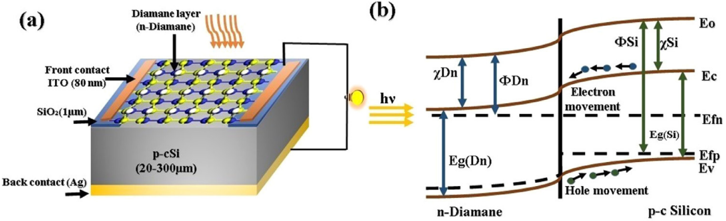

In [17]:


img_bytes = images[3]["image_png"]              # raw PNG bytes
img = Image.open(io.BytesIO(img_bytes))         # PIL.Image.Image
print(img.size, img.mode)                               # e.g., (width, height), "RGB"
display(img)